In [7]:
import pandas as pd

# The Data
[Read about the data here](https://www.kaggle.com/lava18/google-play-store-apps)

In [8]:
google_play_df = pd.read_csv("data/google-play-store-apps/googleplaystore.csv")
google_play_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [9]:
google_play_reviews_df = pd.read_csv("data/google-play-store-apps/googleplaystore_user_reviews.csv")
google_play_reviews_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [106]:
google_play_df.info()
print(google_play_df['Rating'])
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    NaN
10839    4.5
10840    4.5
Name: Rating, Length

,ratings,size
0,4.1,19M
1,3.9,14M
2,4.7,8.7M
3,4.5,25M
4,4.3,2.8M


# Question 1: 
Which app category, in your opinion, has the best ratings? How are you measuring best ratings?


Use the `googleplaystore.csv`

# Question 2:
Is there a relationship between ratings and size? How did you measure the relationship? Why did you choose this measurement? 

Please create a scatterplot of size vs ratings to demonstrate the relationship or lack thereof. 

In [126]:
data = pd.DataFrame({'Size': google_play_df['Size'],
                    'Rating' : google_play_df['Rating']})

#had one outlier of a 19.0 rating, so made any rating over 5 into 5
data.loc[data['Rating'] > 5, 'Rating'] = 5

data.head()

,Size,Rating
0,19M,4.1
1,14M,3.9
2,8.7M,4.7
3,25M,4.5
4,2.8M,4.3


In [127]:

#created new column to contain measurements of application size 
measurements = data['Size'].apply(lambda x: ''.join(filter(str.isalpha, x)))
data['measurements'] = measurements
data.head()

,Size,Rating,measurements
0,19M,4.1,M
1,14M,3.9,M
2,8.7M,4.7,M
3,25M,4.5,M
4,2.8M,4.3,M


In [129]:
def make_numerical(n):
    try:
        return float(n)
    except:
        return 0
            
data['number'] = data['Size'].apply(lambda s: ''.join(filter(lambda x: x in '0123456789.', s)))
data['number'] = data['number'].apply(make_numerical)
data.head()

,Size,Rating,measurements,umber,number
0,19M,4.1,M,19,19.0
1,14M,3.9,M,14,14.0
2,8.7M,4.7,M,8.7,8.7
3,25M,4.5,M,25,25.0
4,2.8M,4.3,M,2.8,2.8


In [118]:
measurements.unique()
mapper = {"M": 1000000, "k": 1000, "Varieswithdevice": 0, "":0}

In [130]:
data['units'] = data['measurements'].map(mapper)
data.head()

,Size,Rating,measurements,umber,number,units
0,19M,4.1,M,19,19.0,1000000
1,14M,3.9,M,14,14.0,1000000
2,8.7M,4.7,M,8.7,8.7,1000000
3,25M,4.5,M,25,25.0,1000000
4,2.8M,4.3,M,2.8,2.8,1000000


0        19000000.0
1        14000000.0
2         8700000.0
3        25000000.0
4         2800000.0
            ...    
10836    53000000.0
10837     3600000.0
10838           0.0
10839           0.0
10840    19000000.0
Name: Size, Length: 10841, dtype: float64
0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10836    4.5
10837    5.0
10838    0.0
10839    4.5
10840    4.5
Name: Rating, Length: 10841, dtype: float64


<IPython.core.display.Javascript object>


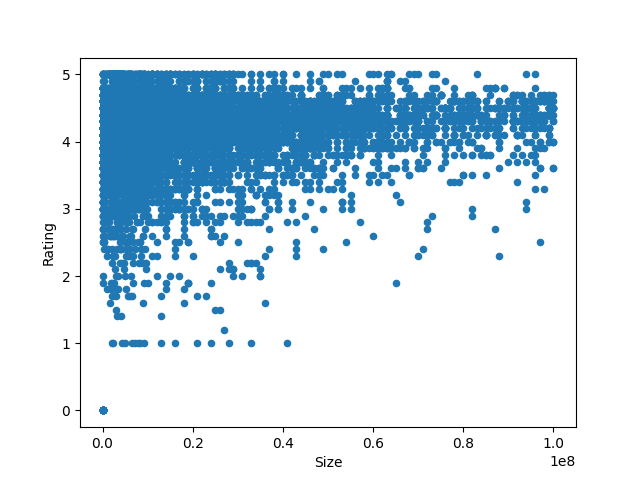

In [131]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.available

data['Size'] = (data['units'] * data['number'])

data.iloc[data['Rating'].isnull()] = 0
    

data['Rating']


print(data['Size'])
print(data['Rating'])

data.head()



data.plot.scatter('Size', 'Rating');




<IPython.core.display.Javascript object>


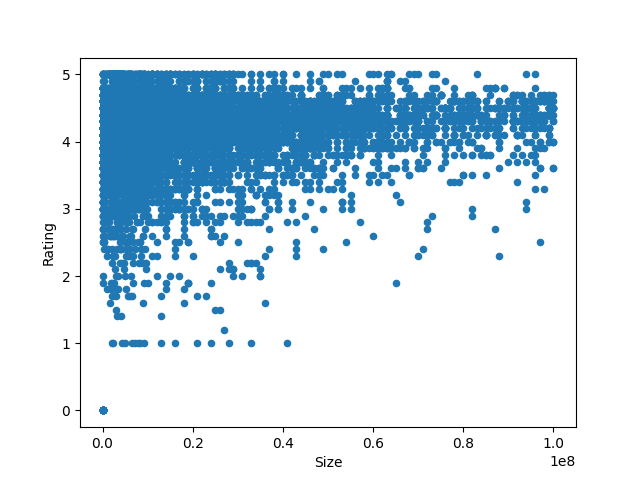

,Size,Rating,number,units
Size,4.997572e+14,9.797059e+06,3.375017e+08,5.077795e+12
Rating,9.797059e+06,2.293865e+00,1.411629e+01,3.844922e+05
number,3.375017e+08,1.411629e+01,6.605612e+03,-2.015537e+06
units,5.077795e+12,3.844922e+05,-2.015537e+06,2.142119e+11


In [143]:
data = pd.DataFrame({'Size': google_play_df['Size'],
                    'Rating' : google_play_df['Rating']})

#had one outlier of a 19.0 rating, so made any rating over 5 into 5
data.loc[data['Rating'] > 5, 'Rating'] = 5

#make measurements column to take in 'Size' measurements (M, k, etc) and checks if characters in str are alphabets
measurements = data['Size'].apply(lambda x: ''.join(filter(str.isalpha, x)))
data['measurements'] = measurements

#create a function to determine whether or not values in numbers column are floats
def make_numerical(n):
    try:
        return float(n)
    except:
        return 0
    
#create a number column that contains the float numerical values of 'Size column' using make_numerical function       
data['number'] = data['Size'].apply(lambda s: ''.join(filter(lambda x: x in '0123456789.', s)))
data['number'] = data['number'].apply(make_numerical)
data.head()

#identify unique measurements and use mapper to assign values to measurements and add values to measurements column
measurements.unique()
mapper = {"M": 1000000, "k": 1000, "Varieswithdevice": 0, "":0}
data['units'] = data['measurements'].map(mapper)

#multiply units and number columns to get 'size' column values
data['Size'] = (data['units'] * data['number'])

#eliminate any naN values in 'rating' column
data.iloc[data['Rating'].isnull()] = 0

#plot scatter plot
data.plot.scatter('Size', 'Rating');

#find covarience
data.cov()



# For this next section, choose a Category of playstore apps

## Category Chosen: [insert here]



# Question 3:
For your category, how many genres are represented? What are their counts? Please show this with a bar chart. 

# Question 4: You choose what you want to investigate